<a href="https://colab.research.google.com/github/rahiakela/machine-learning-algorithms/blob/main/neural-networks-from-scratch/03-adding-layers/dense_layer_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dense Layer from Scratch

Neural networks become “deep” when they have 2 or more hidden layers . At the
moment, we have just one layer, which is effectively an output layer. Why we want two or more hidden layers will become apparent.

Currently, we have no hidden layers. A
hidden layer isn’t an input or output layer; as the scientist, you see data as they are handed to the
input layer and the resulting data from the output layer. Layers between these endpoints have
values that we don’t necessarily deal with, hence the name “hidden.”

You will often use them to diagnose issues or
improve your neural network. To explore this concept, let’s add another layer to this neural
network, and, for now, let’s assume these two layers that we’re going to have will be the hidden
layers, and we just have not coded our output layer yet.

Before we add another layer, let’s think about what will be coming. In the case of the first layer,
we can see that we have an input with 4 features.

<img src='https://github.com/rahiakela/machine-learning-algorithms/blob/main/neural-networks-from-scratch/03-adding-layers/images/1.png?raw=1' width='600'/>

Samples (feature set data) get fed through the input, which does not change it in any way, to our
first hidden layer, which we can see has 3 sets of weights, with 4 values each.

Each of those 3 unique weight sets is associated with its distinct neuron. Thus, since we have 3
weight sets, we have 3 neurons in this first hidden layer. Each neuron has a unique set of weights,
of which we have 4 (as there are 4 inputs to this layer), which is why our initial weights have a
shape of `(3,4)`.

Now, we wish to add another layer. To do that, we must make sure that the expected input to
that layer matches the previous layer’s output. We have set the number of neurons in a layer by
setting how many weight sets and biases we have.

The previous layer’s influence on weight sets
for the current layer is that each weight set needs to have a separate weight per input. This
means a distinct weight per neuron from the previous layer (or feature if we’re talking the
input). The previous layer has 3 weight sets and 3 biases, so we know it has 3 neurons. This then
means, for the next layer, we can have as many weight sets as we want (because this is how
many neurons this new layer will have), but each of those weight sets must have 3 discrete weights.

To create this new layer, we are going to copy and paste our weights and biases to weights2
and biases2 , and change their values to new made up sets. Here’s an example:

In [ ]:
import numpy as np

inputs = [
  [1.0, 2.0, 3.0, 2.5],
  [2.0, 5.0, -1.0, 2.0], 
  [-1.5, 2.7, 3.3, -0.8]
]

weights = [
  [0.2, 0.8, -0.5, 1.0],
  [0.5, -0.91, 0.26, -0.5],
  [-0.26, -0.27, 0.17, 0.87]
]          
biases = [2.0, 3.0, 0.5]

weights2 = [
  [0.1, -0.14, 0.5],
  [-0.5, 0.12, -0.33],
  [-0.44, 0.73, -0.13]
]          
biases2 = [-1.0, 2.0, -0.5]

Next, we will now call outputs `layer1_ouputs`:

In [ ]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
print(layer1_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


As previously stated, inputs to layers are either inputs from the actual dataset you’re training with
or outputs from a previous layer. 

That’s why we defined 2 versions of weights and biases but only
1 of inputs — because the inputs for layer 2 will be the outputs from the previous layer:

In [ ]:
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


All together now:

In [ ]:
inputs = [
  [1.0, 2.0, 3.0, 2.5],
  [2.0, 5.0, -1.0, 2.0], 
  [-1.5, 2.7, 3.3, -0.8]
]

weights = [
  [0.2, 0.8, -0.5, 1.0],
  [0.5, -0.91, 0.26, -0.5],
  [-0.26, -0.27, 0.17, 0.87]
]          
biases = [2.0, 3.0, 0.5]

weights2 = [
  [0.1, -0.14, 0.5],
  [-0.5, 0.12, -0.33],
  [-0.44, 0.73, -0.13]
]          
biases2 = [-1.0, 2.0, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


At this point, our neural network could be visually represented as:

<img src='https://github.com/rahiakela/machine-learning-algorithms/blob/main/neural-networks-from-scratch/03-adding-layers/images/2.png?raw=1' width='600'/>

##Training Data

Next, rather than hand-typing in random data, we’ll use a function that can create non-linear data. What do we mean by non-linear? Linear data can be fit with or represented by a straight line.

<img src='https://github.com/rahiakela/machine-learning-algorithms/blob/main/neural-networks-from-scratch/03-adding-layers/images/3.png?raw=1' width='600'/>

Non-linear data cannot be represented well by a straight line.

<img src='https://github.com/rahiakela/machine-learning-algorithms/blob/main/neural-networks-from-scratch/03-adding-layers/images/4.png?raw=1' width='600'/>

If you were to graph data points of the form `(x, y)` where `y = f(x)` , and it looks to be a line with a clear trend or slope, then chances are, they’re linear data!

**Linear data are very easily approximated by far simpler machine learning models than neural networks.** 

What other machine learning algorithms cannot approximate so easily are non-linear datasets. To simplify this, we’ve
created a Python package that you can install with pip, called `nnfs`:



In [ ]:
!pip install nnfs

The nnfs package contains functions that we can use to create data. 

For example:

In [5]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
import matplotlib.pyplot as plt

We will also use this package to ensure repeatability for everyone, using `nnfs.init()` , after importing `NumPy`:

In [6]:
nnfs.init()

The spiral_data function allows us to create a dataset with as many classes as we want. The
function has parameters to choose the number of classes and the number of points/observations
per class in the resulting non-linear dataset. For example:

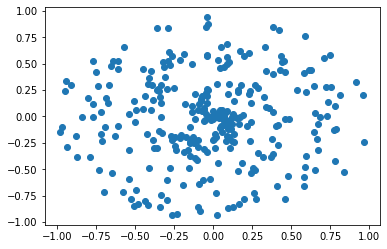

In [7]:
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

If you trace from the center, you can determine all 3 classes separately, but this is a very challenging problem for a machine learning classifier to solve.

Adding color to the chart makes this more clear:

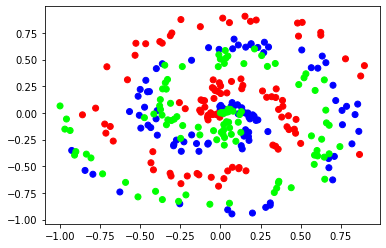

In [8]:
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

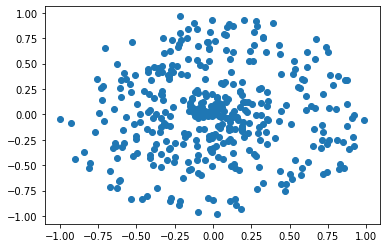

In [9]:
X, y = spiral_data(samples=100, classes=4)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

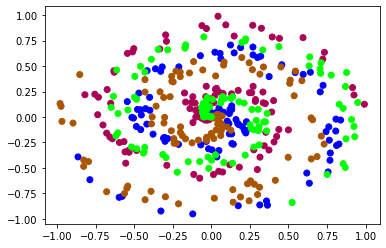

In [10]:
X, y = spiral_data(samples=100, classes=4)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

Keep in mind that the neural network will not be aware of the color differences as the data have no class encodings.

In the data above, each dot is the feature, and its coordinates are the samples that form the dataset. The “classification” for that dot has to do with which spiral it is a part of, depicted by blue, green, or red color in the
previous image. These colors would then be assigned a class number for the model to fit to, like 0, 1, and 2.

##Dense Layer Class